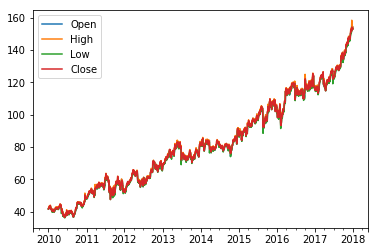

In [110]:
#trade the boring consumer stocks when they open down and yesterday was a down day

from pandas_datareader import data, wb
import datetime

# https://www.youtube.com/watch?v=aaWLM60KxGg
# https://www.businessinsider.com.au/stocks-fall-during-regular-trading-hours-rise-overnight-2016-3
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2018, 1, 1)

f = data.DataReader('ACN', 'morningstar', start, end)
f.index = f.index.map(lambda x: x[1]) # convert index

f[['Open','High','Low','Close']].plot()

cc    0.071391
co   -0.040329
oc    0.111476
dtype: float64

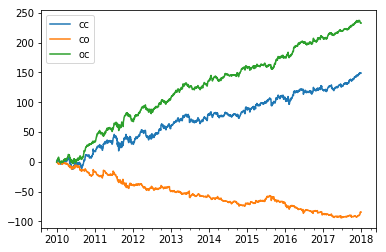

In [111]:
f['cc'] = 100*f['Close'].pct_change() # close to close change in %
f['co'] = 100*(f['Open'] / f['Close'].shift(1)-1) # close to open change in %
f['oc'] = 100*(f['Close'] / f['Open']-1) # open to close change in %

f[['cc','co','oc']].cumsum().plot()
f[['cc','co','oc']].mean()

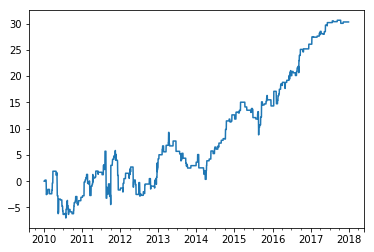

In [112]:
f['doTrade'] = (f['cc']<-0.25).shift(1) & (f['co'] < -0.1) # Find days that satisfy the strategy rules
f.loc[f.index[0], 'doTrade'] = False # Set the first value to False

f['pnl'] = 0. # init pnl column with zeros
f.loc[f['doTrade'],'pnl'] = f['oc'] # Set the pnl values to the daily return value where 'doTrade' is True
f['pnl'].cumsum().plot()

In [ ]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Here I just copy and paste the code from above and put it into a function




start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2018, 1, 1)
   
ohcl = data.DataReader('ACN', 'morningstar', start, end)
ohcl.index = ohcl.index.map(lambda x: x[1]) # convert index
    
def backtest(f, ccThresh=-0.25, coThresh=-0.1):
    
    f['cc'] = 100*f['Close'].pct_change() # close to close change in %
    f['co'] = 100*(f['Open'] / f['Close'].shift(1)-1) # close to open change in %
    f['oc'] = 100*(f['Close'] / f['Open']-1) # open to close change in %
        
    f['doTrade'] = (f['cc']<ccThresh).shift(1) & (f['co'] < coThresh) # Find days that satisfy the strategy rules
    f.loc[f.index[0], 'doTrade'] = False # Set the first value to False
    
    f['pnl'] = 0. # init pnl column with zeros
    f.loc[f['doTrade'],'pnl'] = f['oc'] # Set the pnl values to the daily return value where 'doTrade' is True
    
    return f['pnl']

def sharpe(pnl):
    return  np.sqrt(250)*pnl.mean()/pnl.std()

ccThresh=np.linspace(-2,2,30) 
coThresh=np.linspace(-1,2,30) 
SH = np.zeros((len(ccThresh), len(coThresh)))

for i, cc in enumerate(ccThresh):
    for j, co in enumerate(coThresh):
        pnl = backtest(ohcl,ccThresh=cc, coThresh=co)
        SH[i,j] = sharpe(pnl)

plt.pcolor(coThresh, ccThresh, SH)
plt.xlabel('opening gap %')
plt.ylabel('previous day change %')
plt.colorbar()